## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merge_df=pd.merge(study_results,mouse_metadata,  how="left", on="Mouse ID")

merge_df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
total_mice=merge_df['Mouse ID'].count()
print(total_mice)

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows=merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows                                            
duplicated_mouse=duplicate_rows.iloc[0]['Mouse ID']
duplicated_mouse


'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# all_duplicate_rows=merge_df[merge_df.duplicated(["Mouse ID",])]
# all_duplicate_rows

duplicate_data=merge_df.loc[merge_df['Mouse ID']==duplicated_mouse,:]
#duplicate_data

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clear_df=merge_df.loc[merge_df['Mouse ID']!=duplicated_mouse]
#clear_df

In [6]:
# Checking the number of mice in the clean DataFrame.
total_mouse=clear_df['Mouse ID'].nunique()
print(total_mouse)

248


In [7]:
#Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

mean=clear_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=clear_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=clear_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv=clear_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem=clear_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#summary data frame
sum_stat_df=pd.DataFrame({"Mean":mean, 'Median':median, 'Variance':variance, 'Standard Deviation':standard_dv,'SEM':sem})
sum_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurement')

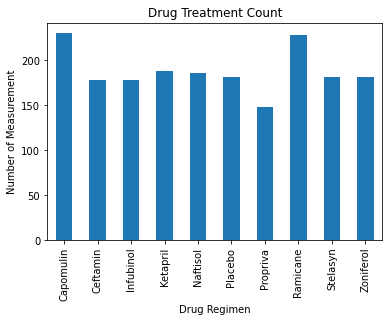

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs_df=clear_df.groupby(['Drug Regimen']).count()["Mouse ID"]
drugs_df.plot(kind="bar")
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurement")





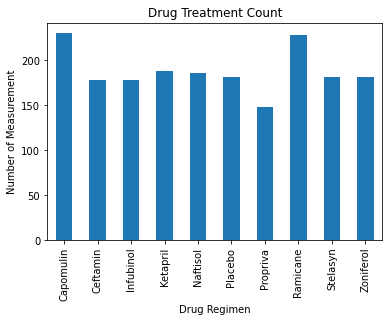

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs_df.plot(kind="bar")
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurement")

plt.show()


In [10]:
# # Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice=clear_df.groupby('Sex')
gender_mice_count=pd.DataFrame(gender_mice['Sex'].count())
gender_mice_count
print(gender_mice_count)





        Sex
Sex        
Female  922
Male    958


<AxesSubplot:ylabel='Sex'>

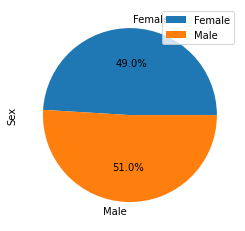

In [11]:
# #pie panda
gender_mice_count.plot(kind="pie",y="Sex", autopct="%1.1f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

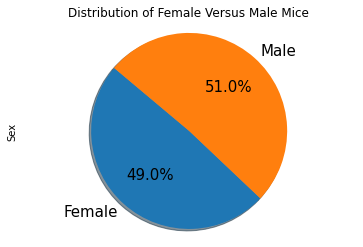

In [12]:
#pie plot
gender_mice_count.plot(kind="pie", y="Sex",\
                      title="Distribution of Female Versus Male Mice", startangle=140,\
                      autopct="%1.1f%%", shadow=True, fontsize=15,legend=False)
plt.axis("equal")
plt.show


## Quartiles, Outliers and Boxplots

In [13]:
clear_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
#create data frame for 4 company
drug4_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug4_list=clear_df[clear_df['Drug Regimen'].isin(drug4_list)]

tumorsize_drug4=clear_df.groupby(['Mouse ID'])["Timepoint"].max()
tumorsize_drug4=tumorsize_drug4.reset_index()
tumorsize_drug4
#merge tumorsize and clear data 
merge_data=pd.merge(tumorsize_drug4,clear_df,on=["Mouse ID","Timepoint"])
#merge_data


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug4_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for item in drug4_list:
    
# Locate the rows which contain mice on each drug and get the tumor volumes 
    finalvolume=merge_data.loc[merge_data['Drug Regimen']==item,"Tumor Volume (mm3)"]
    
    
# add subset 
    tumor_volume.append(finalvolume)
    
    
# Determine outliers using upper and lower bounds
    quartiles = finalvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of finalvolume is: {lowerq}")
    print(f"The upper quartile of finalvolume is: {upperq}")
    print(f"The interquartile range of finalvolume is: {iqr}")
    print(f"The the median of finalvolume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of finalvolume is: 32.37735684
The upper quartile of finalvolume is: 40.1592203
The interquartile range of finalvolume is: 7.781863460000004
The the median of finalvolume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of finalvolume is: 31.56046955
The upper quartile of finalvolume is: 40.65900627
The interquartile range of finalvolume is: 9.098536719999998
The the median of finalvolume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of finalvolume is: 54.04860769
The upper quartile of finalvolume is: 65.52574285
The interquartile range of finalvolume is: 11.477135160000003
The the median of finalvolume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of finalvolume is: 48.72207785
The upper quartile of finalvol

<function matplotlib.pyplot.show(close=None, block=None)>

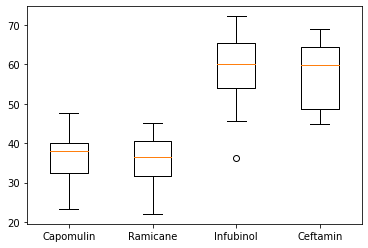

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.boxplot(tumor_volume,labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show
#labels

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

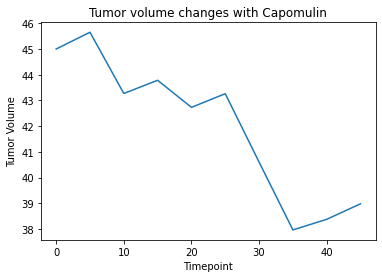

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_mass_forcapo=clear_df.loc[clear_df["Drug Regimen"]=='Capomulin']
mouse_b128=tumor_mass_forcapo.loc[tumor_mass_forcapo['Mouse ID']=="b128"]
plt.plot(mouse_b128["Timepoint"], mouse_b128["Tumor Volume (mm3)"])
#add label/SEPARATE
plt.title("Tumor volume changes with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show
         

Text(0, 0.5, 'Tumor Volume(mm3)')

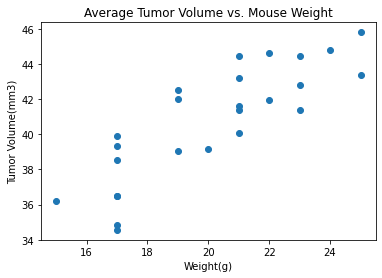

In [18]:
avg_capomass=tumor_mass_forcapo.groupby(["Mouse ID"]).mean()

plt.scatter(avg_capomass["Weight (g)"],avg_capomass["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume(mm3)")



## Correlation and Regression

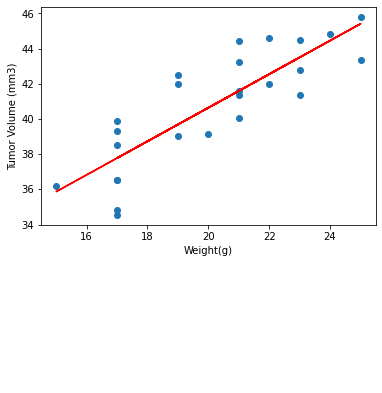

0.8419363424694718


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_capomass['Weight (g)']
y_values = avg_capomass['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(rvalue)